# Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib

# Load the data

In [3]:
df = pd.read_csv('../data/telecom_churn_data.csv')

# Settings

In [4]:
pd.set_option('display.max_columns', None)

# Understand the data (Quick Look)

In [5]:
# Shape of the dataset
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 7043, Columns: 21


In [6]:
# First 5 rows of the dataset:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Understand the data (Data Types)

In [7]:
# Data types of the columns:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Action:
1. Total Charges: Convert to float

#### Now, let us understand each column in the dataset
1. customerID           : This is a unique identifier for each customer in the dataset. (Not much helpful when training the data set.. but can be useful when counting churn and other stuff related to PK)
2. gender               : This is the gender of the customer. (Can be useful when training the data set) [And for training, let's encode it: Female:0, Male: 1]
3. SeniorCitizen       : This is a binary variable indicating whether the customer is a senior citizen (1) or not (0). (Can be useful when training the data set)
4. Partner             : This is a binary variable indicating whether the customer has a partner (Yes) or not (No). (Can be useful when training the data set) [And for training, let's encode it: Yes:1, No: 0]
5. Dependents          : This is a binary variable indicating whether the customer has dependents (Yes) or not (No). (Can be useful when training the data set) [And for training, let's encode it: Yes:1, No: 0]
6. tenure              : This is the number of months the customer has been with the company. (Can be useful when training the data set) [Or we can also extract years from it]
7. PhoneService        : This is a binary variable indicating whether the customer has phone service (Yes) or not (No). This tells you if the customer has a basic phone line or not. (Can be useful when training the data set) [And for training, let's encode it: Yes:1, No: 0]
8. MultipleLines      : This is a binary variable indicating whether the customer has multiple lines (Yes) or not (No). (Can be useful when training the data set) [And for training, let's encode it: Yes:1, No: 0]
9. InternetService     : This is a categorical variable indicating the type of internet service the customer has. (DSL, Fiber optic, No). (Can be useful when training the data set) [And for training, let's encode it: DSL:0, Fiber optic: 1, No: 2]
10. OnlineSecurity     : This is a binary variable indicating whether the customer has online security (Yes) or not (No). (Can be useful when training the data set) [And for training, let's encode it: Yes:1, No: 0]
11. OnlineBackup       : This is a binary variable indicating whether the customer has online backup (Yes) or not (No). (Can be useful when training the data set) [And for training, let's encode it: Yes:1, No: 0]
12. DeviceProtection   : This is a binary variable indicating whether the customer has device protection (Yes) or not (No). (Can be useful when training the data set) [And for training, let's encode it: Yes:1, No: 0]
13. TechSupport        : This is a binary variable indicating whether the customer has tech support (Yes) or not (No). (Can be useful when training the data set) [And for training, let's encode it: Yes:1, No: 0]
14. StreamingTV        : This is a binary variable indicating whether the customer has streaming TV (Yes) or not (No). (Can be useful when training the data set) [And for training, let's encode it: Yes:1, No: 0]
15. StreamingMovies    : This is a binary variable indicating whether the customer has streaming movies (Yes) or not (No). (Can be useful when training the data set) [And for training, let's encode it: Yes:1, No: 0]
16. Contract           : This is a categorical variable indicating the type of contract the customer has (Month-to-month, One year, Two year). (Can be useful when training the data set) [And for training, let's encode it: Month-to-month:0, One year: 1, Two year: 2]
17. PaperlessBilling   : This is a binary variable indicating whether the customer has paperless billing (Yes) or not (No). (Can be useful when training the data set) [And for training, let's encode it: Yes:1, No: 0]
18. PaymentMethod      : This is a categorical variable indicating the payment method the customer uses (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)). (Can be useful when training the data set) [And for training, let's encode it: Electronic check:0, Mailed check: 1, Bank transfer (automatic): 2, Credit card (automatic): 3]
19. MonthlyCharges     : This is the monthly charge for the customer. (Can be useful when training the data set) [Or we can also extract yearly charges from it]
20. TotalCharges       : This is the total charge for the customer. (Can be useful when training the data set) [Or we can also extract yearly charges from it]
21. Churn              : This is the target variable indicating whether the customer has churned (Yes) or not (No). (Can be useful when training the data set) [And for training, let's encode it: Yes:1, No: 0]

## Some Basic Understanding of the Industry
1. Customer Churn: This is a common problem in the telecom industry, where customers leave for various reasons such as better offers from competitors, dissatisfaction with service, etc.
2. Customer Retention: This is the process of keeping customers from leaving. It is often more cost-effective to retain existing customers than to acquire new ones.
3. Tenure is the length of time a customer has been with the company. Longer tenure often indicates higher customer satisfaction and loyalty.
4. Phone service and internet service are essential for telecom companies. Customers may leave if they are not satisfied with these services.
Customers without phone service may only be using internet → less attached to the company. Might indicate cost-cutters or minimal users (possible churners).
5. Multiple lines indicate that the customer has more than one phone line. This may indicate a family plan or multiple lines for business purposes. (less likely to churn)
6. Internet service is a critical component of telecom companies. Customers may leave if they are not satisfied with their internet service. Internet is the main product in many telecom packages. Fiber users may be more loyal, but also more demanding. Customers with no internet are likely low-value or old users → might churn.
7. Online security, online backup, device protection, and tech support are additional services offered by telecom companies. These services may be bundled with internet or phone service. Customers who use these services may be less likely to churn. (less likely to churn)
8. Streaming TV and streaming movies are additional services offered by telecom companies. These services may be bundled with internet or phone service. Customers who use these services may be less likely to churn. (less likely to churn)
9. Contract type is important in the telecom industry. Month-to-month contracts may indicate a lack of commitment from the customer. One-year and two-year contracts may indicate a higher level of commitment. (less likely to churn)
10. Paperless billing is a common practice in the telecom industry. Customers who use paperless billing may be more tech-savvy and less likely to churn. (less likely to churn)
11. Payment method is important in the telecom industry. Customers who use electronic checks may be more tech-savvy and less likely to churn. (less likely to churn)
12. Monthly charges and total charges are important in the telecom industry. Customers who pay higher monthly charges may be more likely to churn. (less likely to churn), [but also more likely to be high-value customers] 



## Checking Missing Values

In [8]:
# Check for missing values in the dataset:
print(f'Missing Values: {df.isnull().sum().sum()}')

# Missing Percentage:
print(f'Missing Percentage: {df.isnull().sum().sum() / df.shape[0] * 100}')


Missing Values: 0
Missing Percentage: 0.0


## Checking Duplicates

In [9]:
# check for duplicates in the dataset:
print(f'Duplicates: {df.duplicated().sum()}')

Duplicates: 0


## Value counts of Target Variable

In [10]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

#### the dataset is imbalanced. 
The target variable has a higher number of non-churned customers compared to churned customers. 
This is common in customer churn datasets, as most customers do not churn. However, it is important to focus that the dataset may be biased towards non-churned customers. 
This can affect the performance of machine learning models trained on this dataset. 
It is important to use techniques such as oversampling, undersampling, or SMOTE to balance the dataset before training the model.
Hence we will use SMOTE to balance the dataset before training the model.

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Encode Churn target variable 'Yes': 1, 'No': 0

In [12]:
df['Churn'].isnull().sum()

np.int64(0)

In [13]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [14]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

# Convert TotalCharges to float

In [15]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [18]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

# EDA (Exploratory Data Analysis)

## 1. Univariate Analysis

### 1.1. Categorical Variables

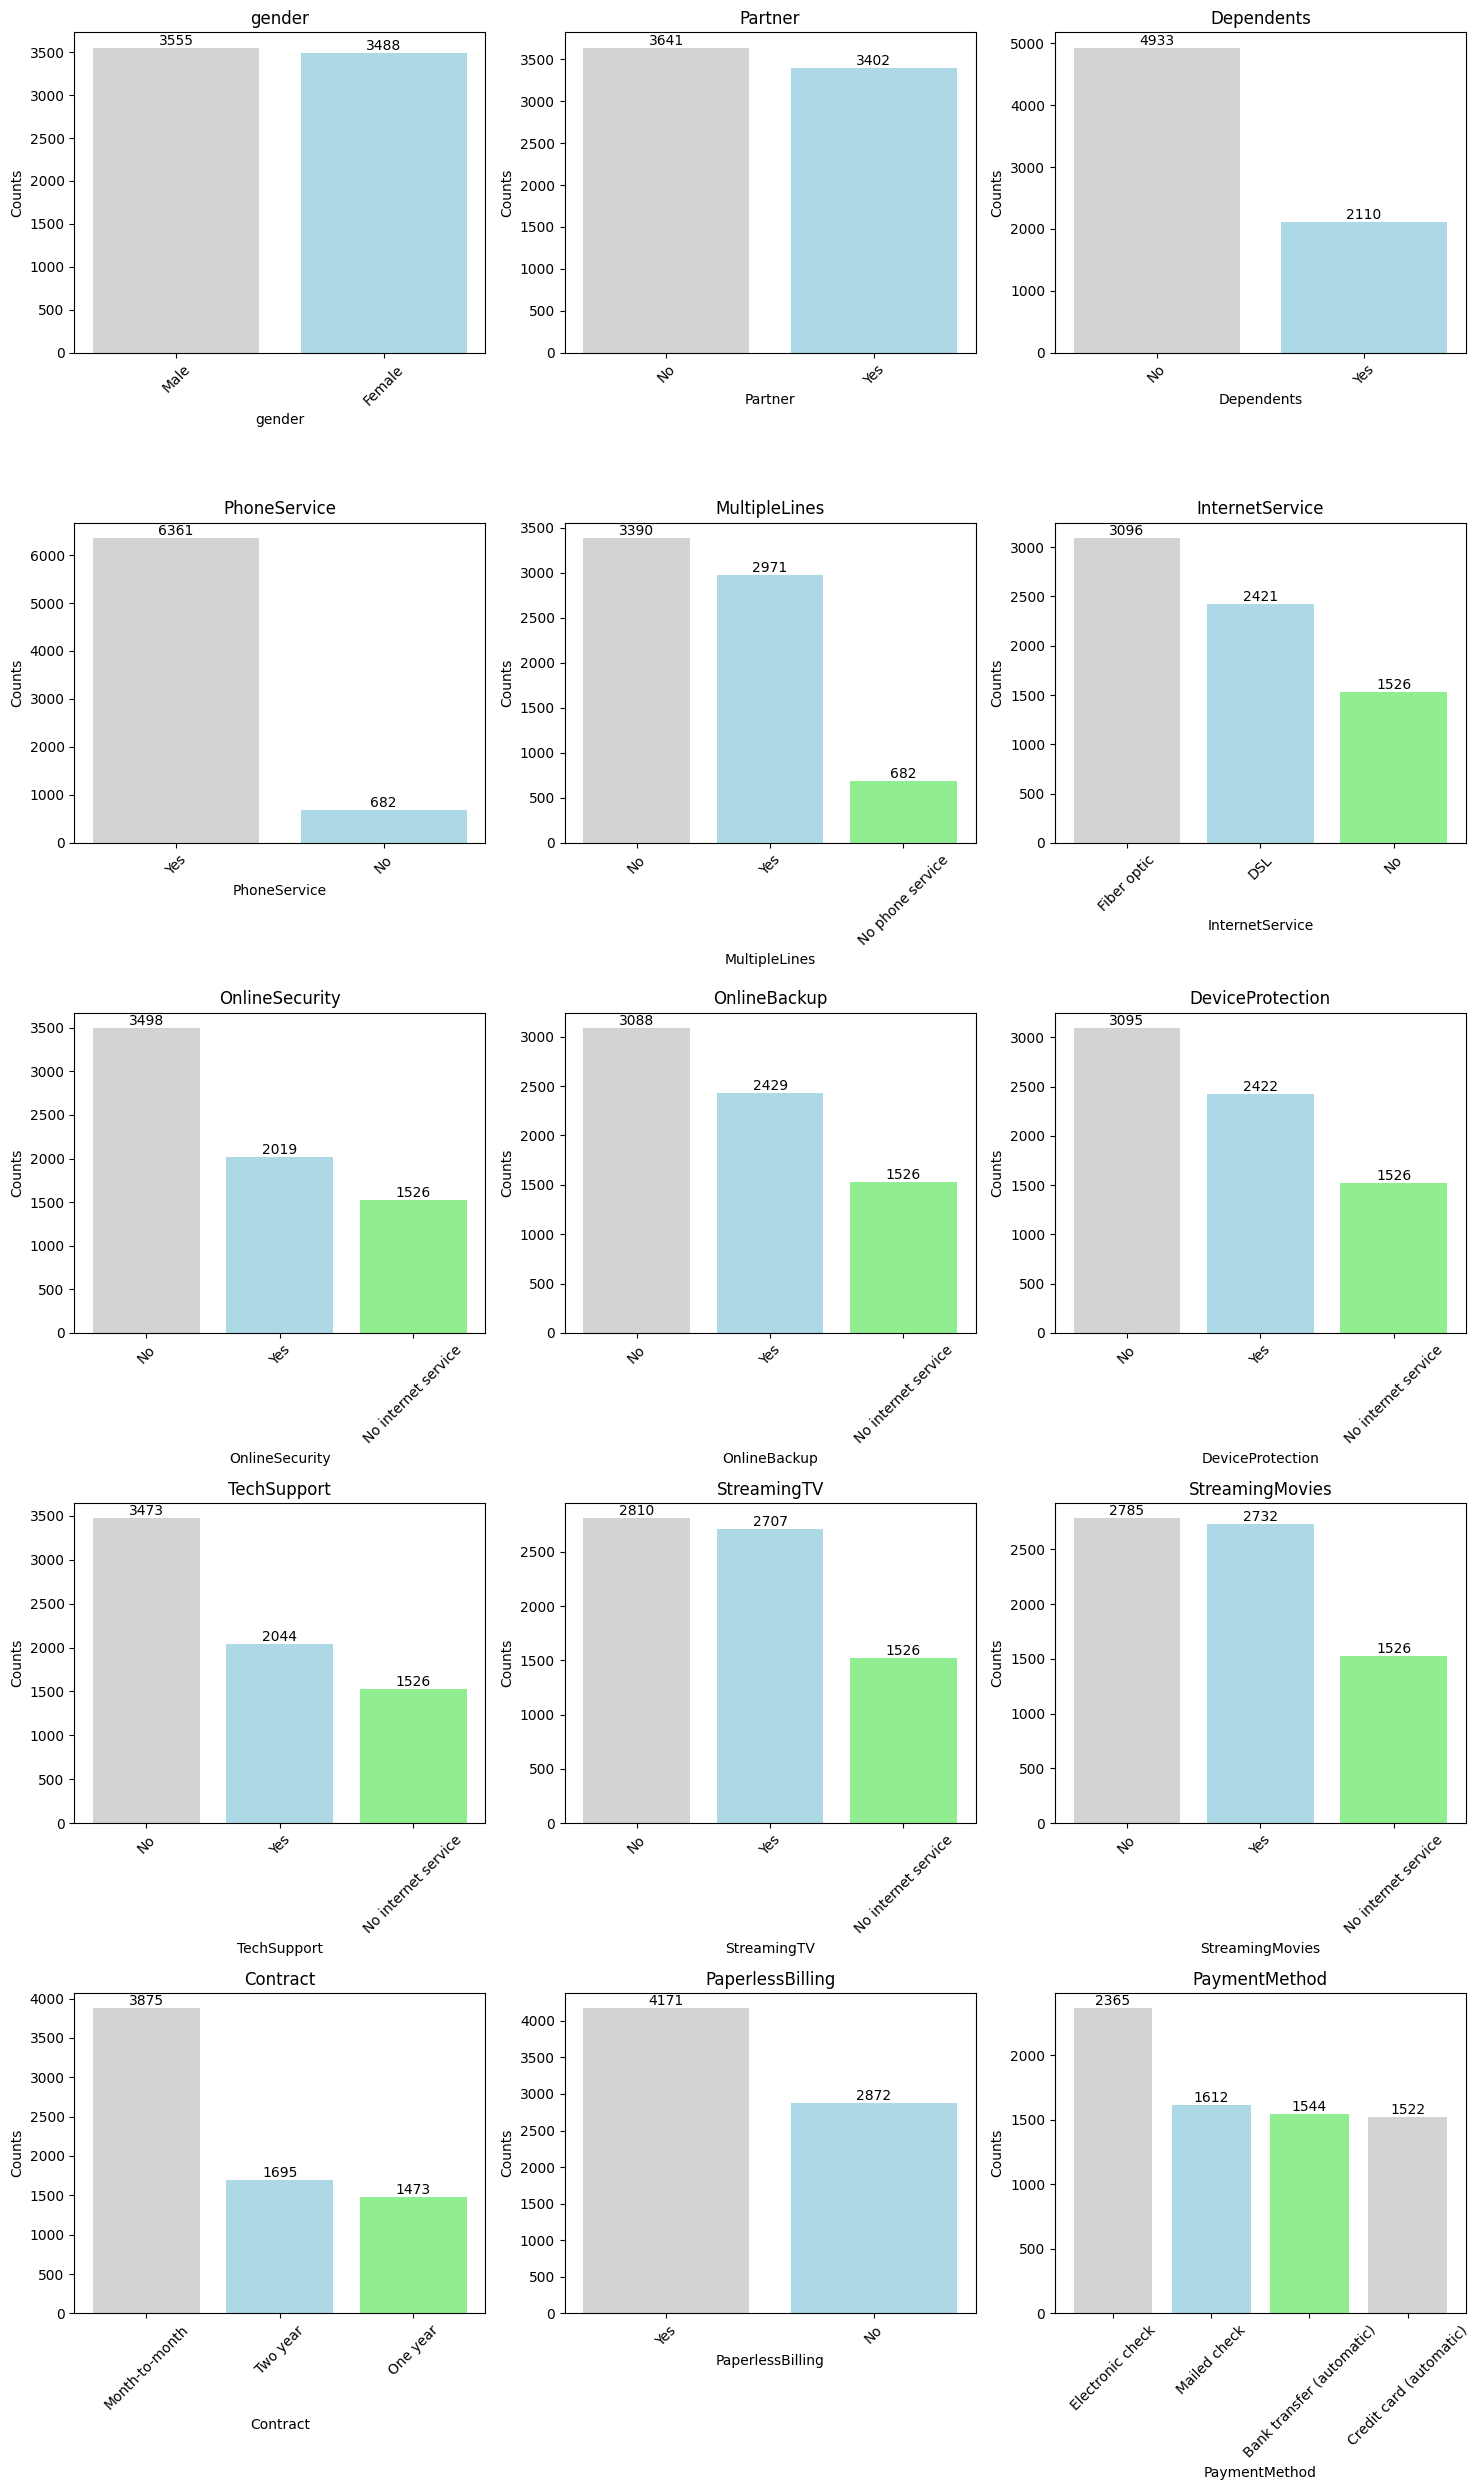

In [16]:
# Get the list of categorical variables
cat_variables = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'CustomerID' from the list of categorical variables
cat_variables = [var for var in cat_variables if var != 'customerID']

# Determine the number of rows and columns for subplots
ncols = 3  # Define number of columns
nrows = (len(cat_variables) + ncols - 1) // ncols  # Calculate the number of rows

# Create subplots with specified grid layout
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through categorical variables and plot them
for idx, variable in enumerate(cat_variables):
    counts = df[variable].value_counts()
    
    # Plotting each categorical variable on the corresponding axis
    ax = axes[idx]
    bars = ax.bar(x=counts.index, height=counts.values, color=['lightgrey', 'lightblue', 'lightgreen'])
    
    # Adding title, labels, and rotating x-axis labels
    ax.set_title(variable)
    ax.set_xlabel(variable)
    ax.set_ylabel('Counts')
    ax.tick_params(axis='x', rotation=45)
    
    # Add count labels above each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, str(int(yval)), 
                ha='center', va='bottom', fontsize=10)

# Remove any unused axes (if the number of categorical variables is less than the grid size)
for i in range(len(cat_variables), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


### 1.2. Numerical Variables

In [17]:
numerical_variables = df.select_dtypes(include=['int', 'float']).columns.tolist()
numerical_variables = [var for var in numerical_variables if var not in ['SeniorCitizen', 'Churn']]
print(numerical_variables)

['tenure', 'MonthlyCharges', 'TotalCharges']


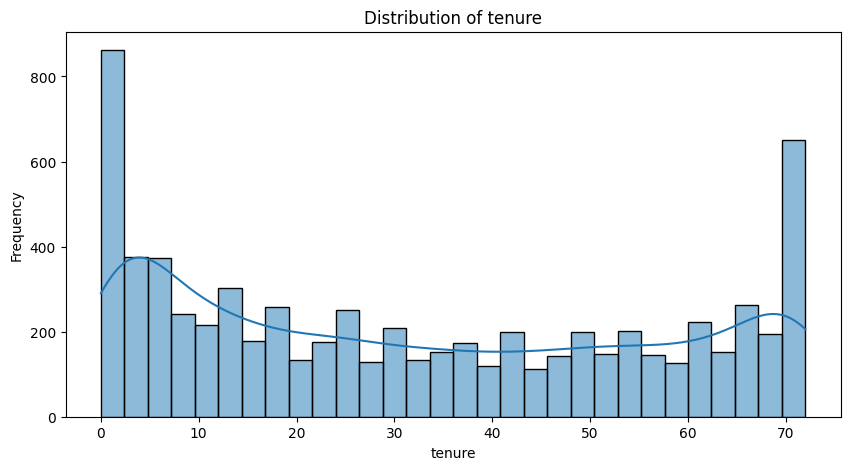

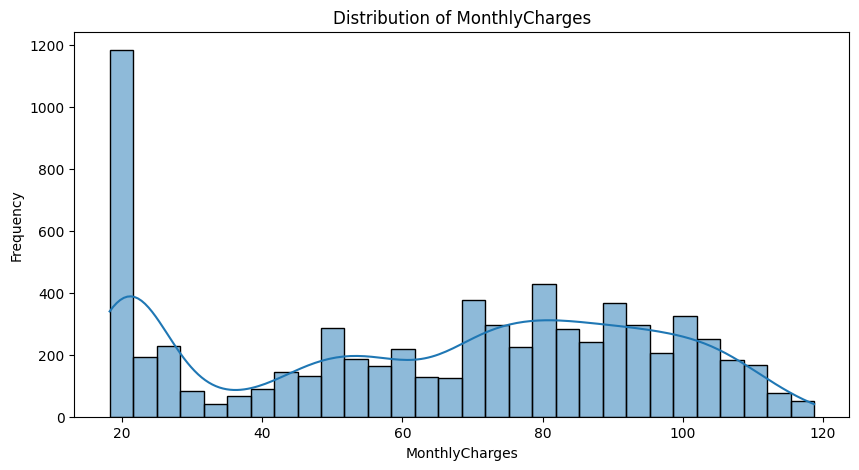

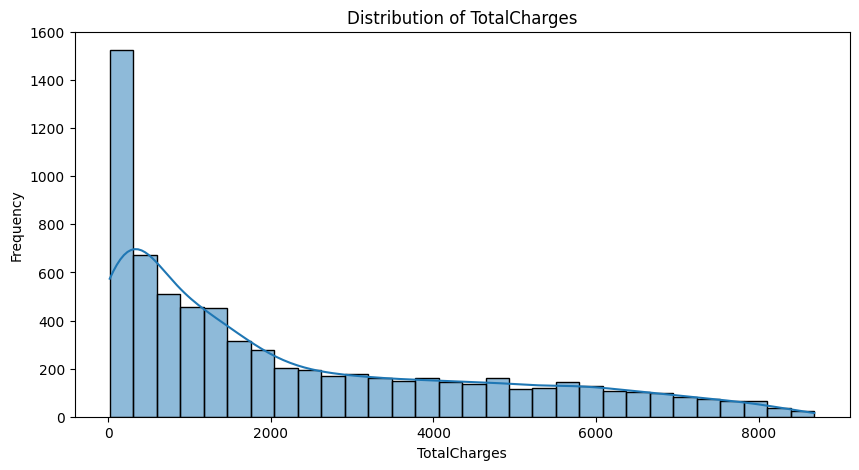

In [18]:
for var in numerical_variables:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

## Bi-Variate Analysis

### 1.1. Categorical Variables

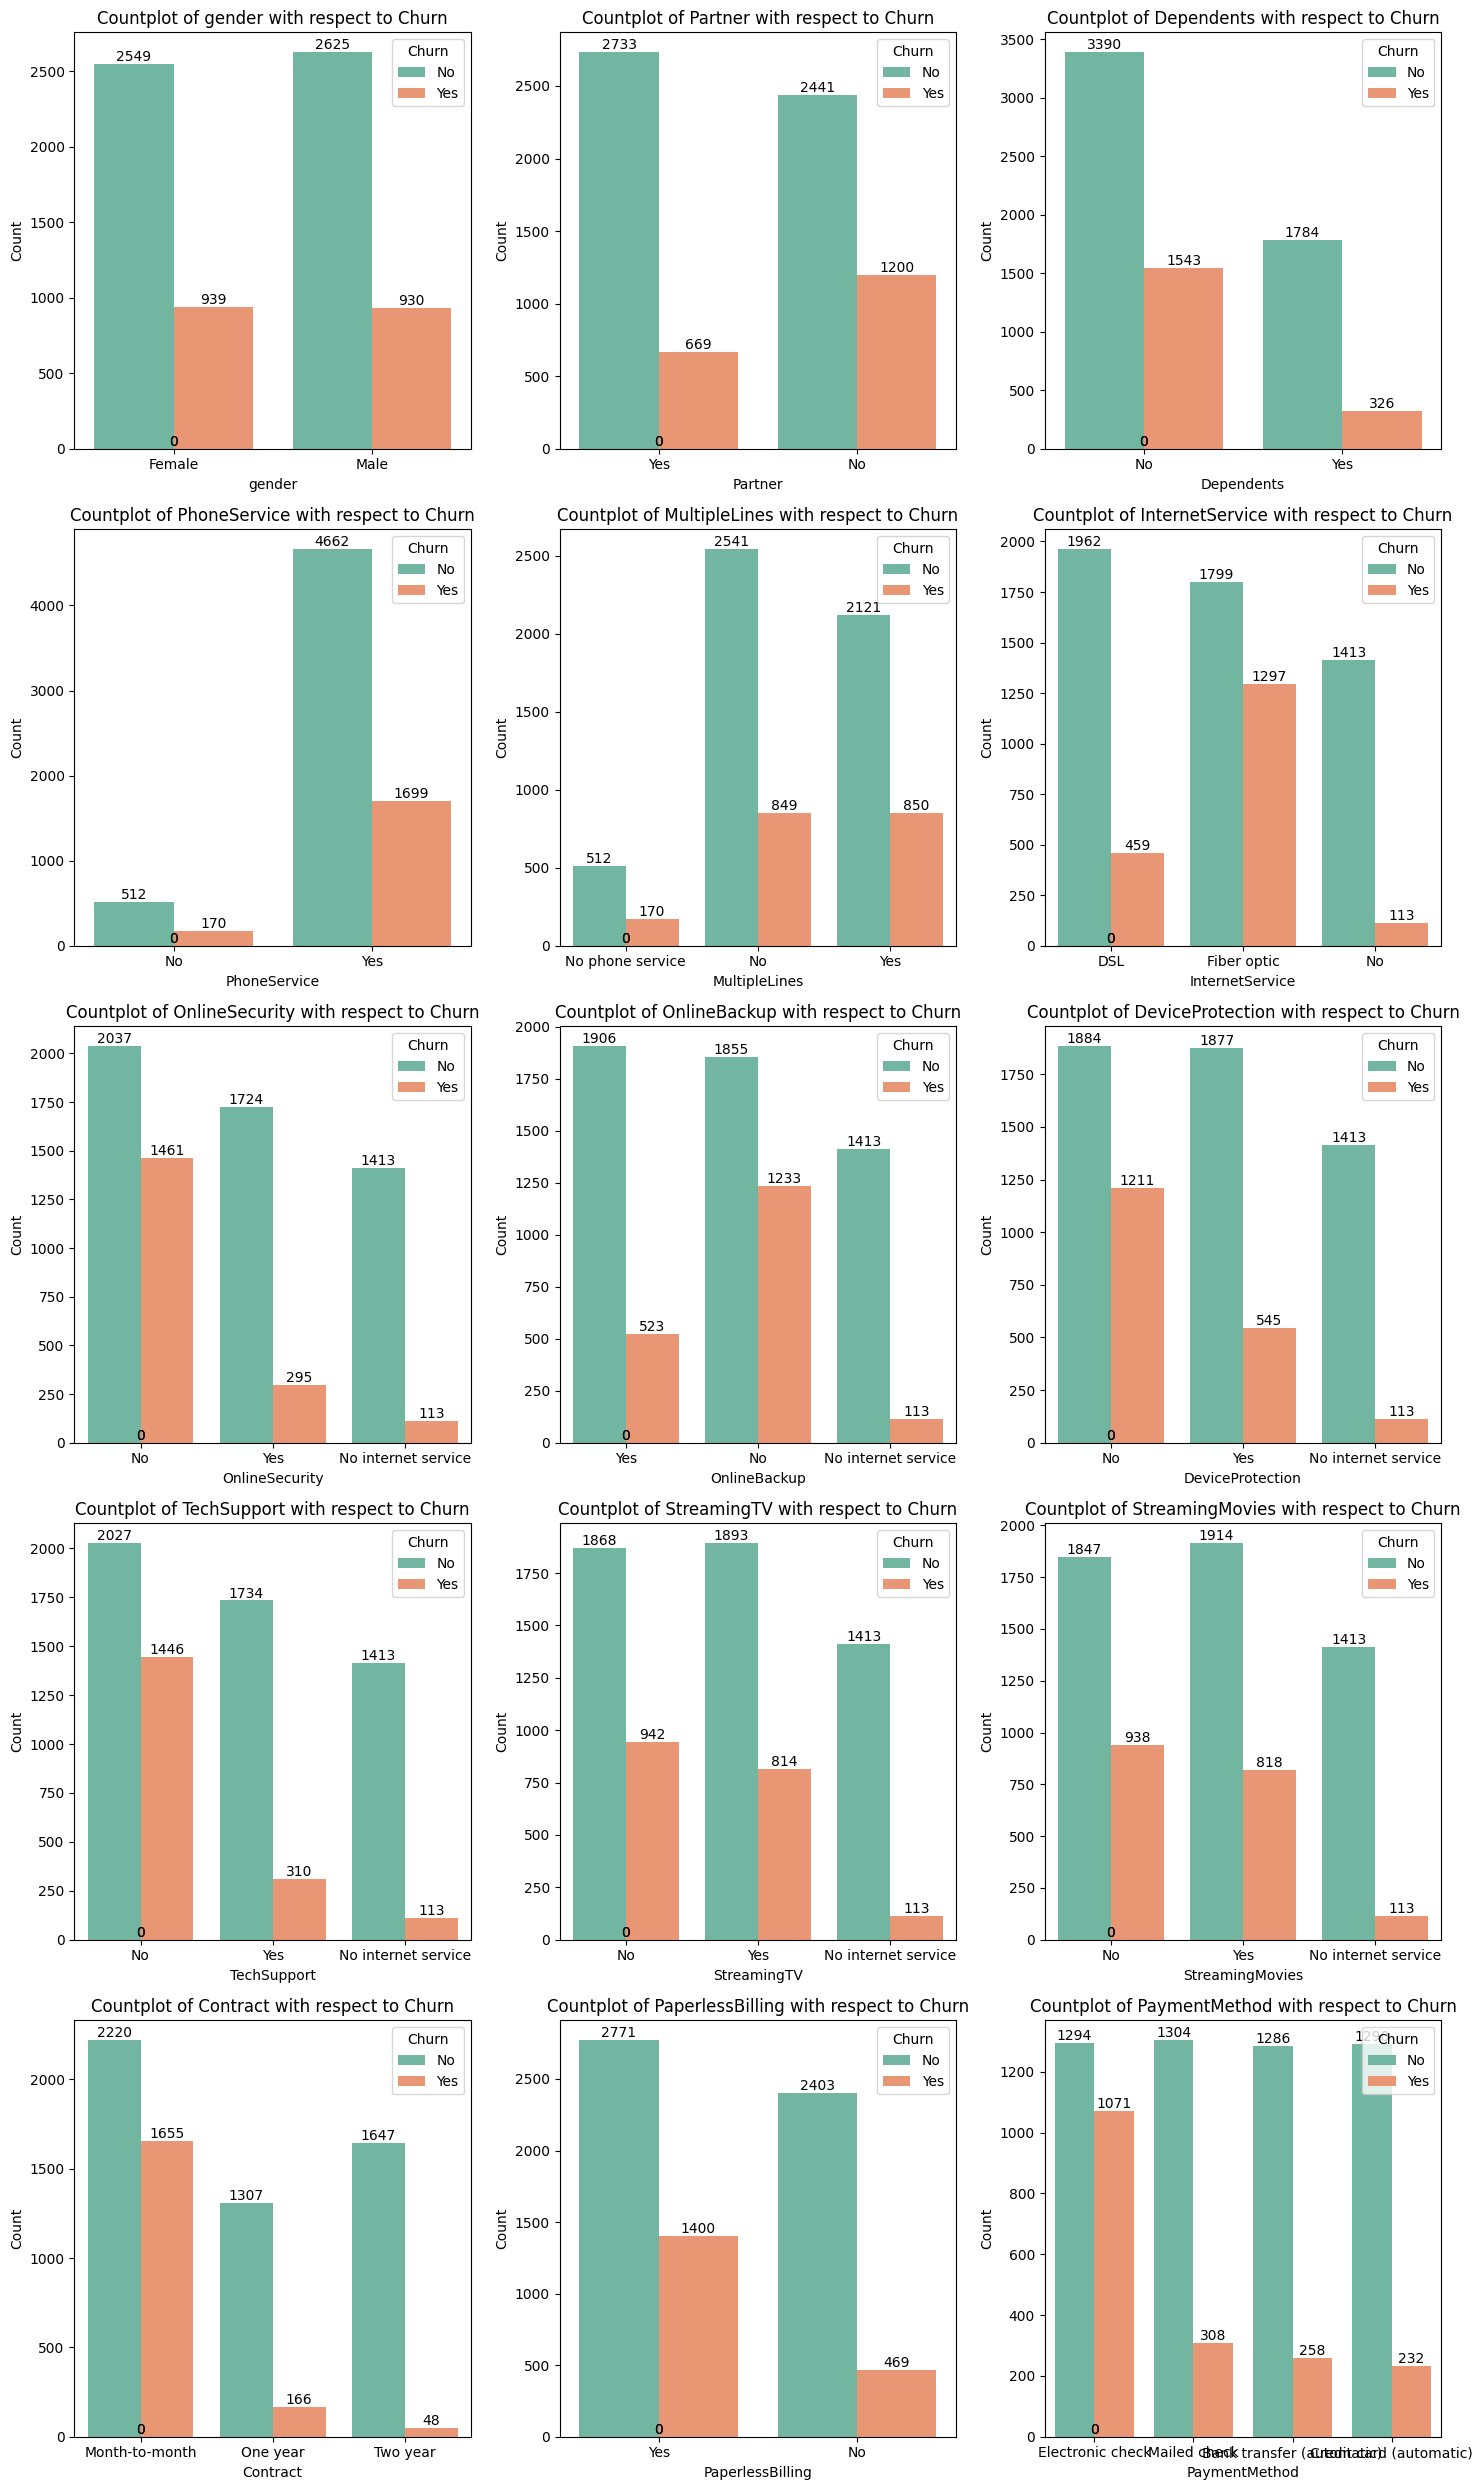

In [19]:
# Determine the number of rows and columns for subplots
ncols = 3  # Define number of columns
nrows = (len(cat_variables) + ncols - 1) // ncols  # Calculate the number of rows based on the number of categorical variables

# Create subplots with specified grid layout
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each categorical variable and plot on the corresponding subplot
for idx, col in enumerate(cat_variables):
    ax = axes[idx]
    
    # Create the countplot
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2', ax=ax)
    
    # Add title and labels
    ax.set_title(f'Countplot of {col} with respect to Churn')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
    
    # Add count labels on top of the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Remove any unused axes (if the number of categorical variables is less than the grid size)
for i in range(len(cat_variables), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


### 1.2. Numerical Variables

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_22608\1317911790.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette='Set2')


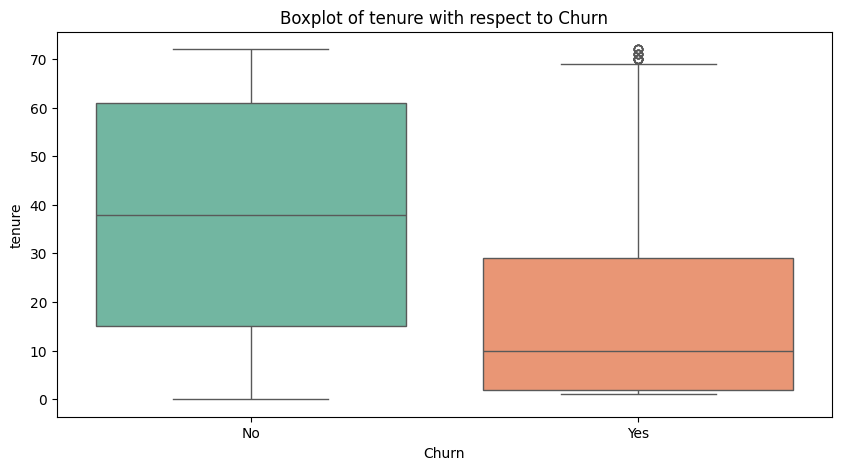

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_22608\1317911790.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette='Set2')


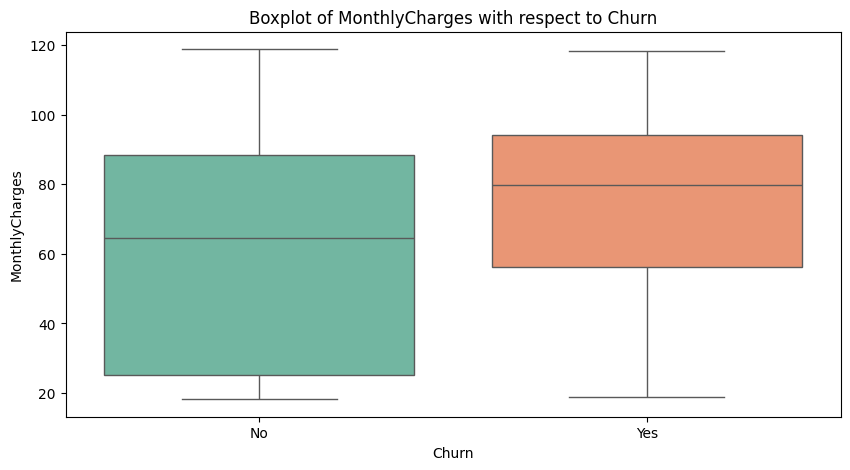

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_22608\1317911790.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette='Set2')


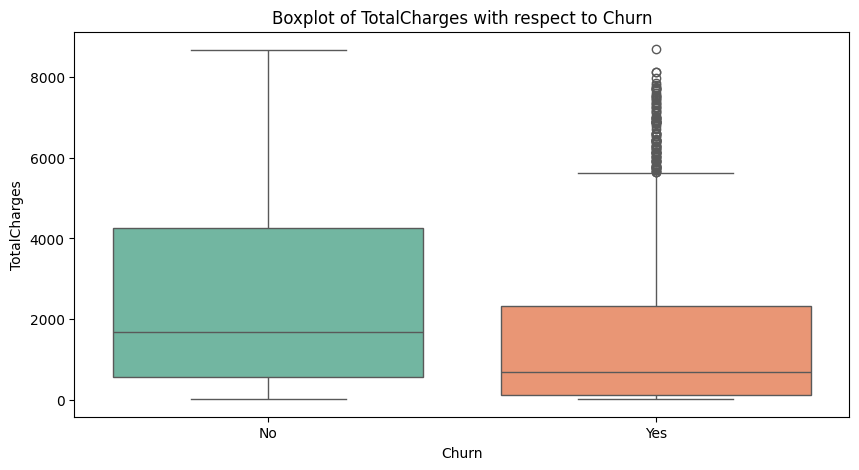

In [20]:
# Plot all numerical variables against the target variable 'Churn'
for var in numerical_variables:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='Churn', y=var, palette='Set2')
    plt.title(f'Boxplot of {var} with respect to Churn')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()

# Data Preprocessing

##### We have already checked that:
1. There are no missing values in the dataset.
2. There are no duplicates in the dataset.
3. The target variable is imbalanced.

##### Data Preprocessing Steps
4. Need to check for outliers in the dataset. ✔️
5. Encode categorical variables. ✔️
6. Scale numerical variables.
7. SMOTE to balance the dataset.

## Outlier Detection and Removal

### 1. Box Plot

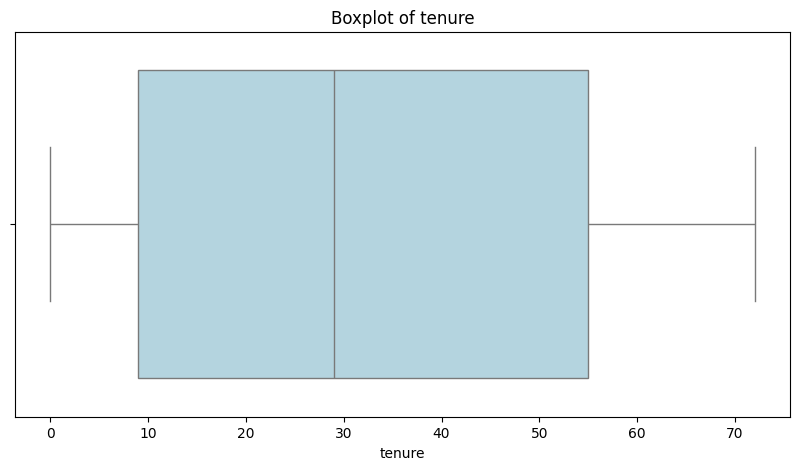

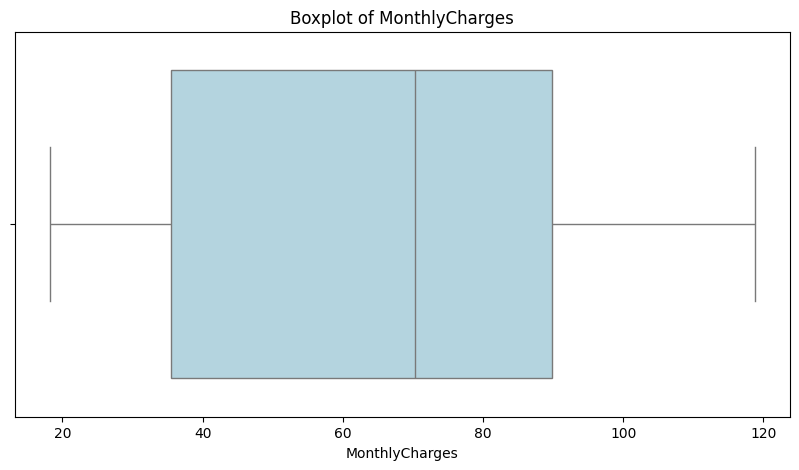

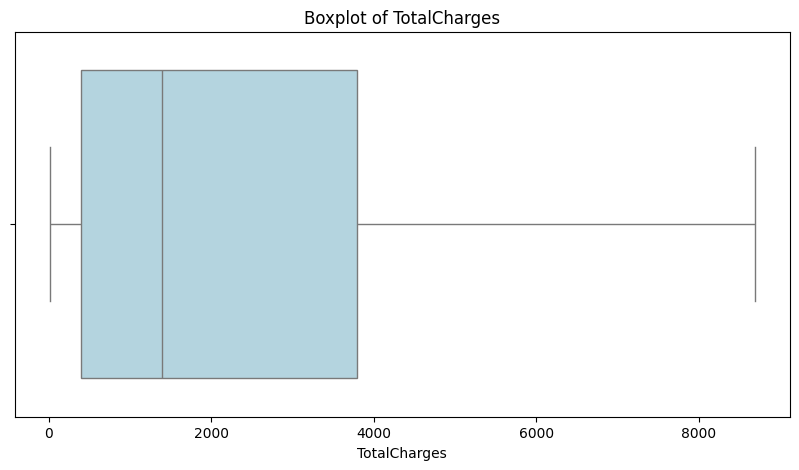

In [25]:
# Let's check outliers in the dataset
def plot_outliers(df, variable):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[variable], color='lightblue')
    plt.title(f'Boxplot of {variable}')
    plt.xlabel(variable)
    plt.show()

# Plot outliers for each numerical variable
plot_outliers(df, 'tenure')
plot_outliers(df, 'MonthlyCharges')
plot_outliers(df, 'TotalCharges')

we can see that from box plot that there are no outliers in the dataset.

### 2. Z-Score

In [27]:
# Check for outliers in the dataset using Z-score method
def check_outliers_zscore(df, variable):
    z_scores = np.abs(stats.zscore(df[variable]))
    outliers = df[z_scores > 3]
    return outliers

# Check outliers for each numerical variable using Z-score method
print(check_outliers_zscore(df, 'tenure'))
print(check_outliers_zscore(df, 'MonthlyCharges'))
print(check_outliers_zscore(df, 'TotalCharges'))


Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


Hence, with Z-score method also we can confirm that there are indeed no Outliers..

## Encode Categorical Variables

In [19]:
td = df.copy()

In [20]:
td.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [21]:
### 1.1: Encoding gender: 
td['gender'] = td['gender'].map({'Female':0, 'Male':1})

In [22]:
### 1.2: Encoding Partner, Dependents, PhoneService, PaperlessBilling -> 
to_encode = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in to_encode:
    td[col] = td[col].map({'No': 0, 'Yes': 1})

In [23]:
### 1.3: Encoding OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, 
to_encode = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in to_encode:
    td[col] = td[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})

In [24]:
### 1.4: Encoding MultipleLines 
td['MultipleLines'] = td['MultipleLines'].map({'No phone service': 0, 'No': 0, 'Yes': 1})

In [25]:
### 1.5: Encoding InternetService
td['InternetService'] = td['InternetService'].map({'DSL': 0, 'Fiber optic': 1, 'No': 2})

In [26]:
### 1.6: Encoding Contract
td['Contract'] = td['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

In [27]:
### 1.7: Encoding PaymentMethod
td['PaymentMethod'] = td['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})

In [28]:
td.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


## Check Correlation

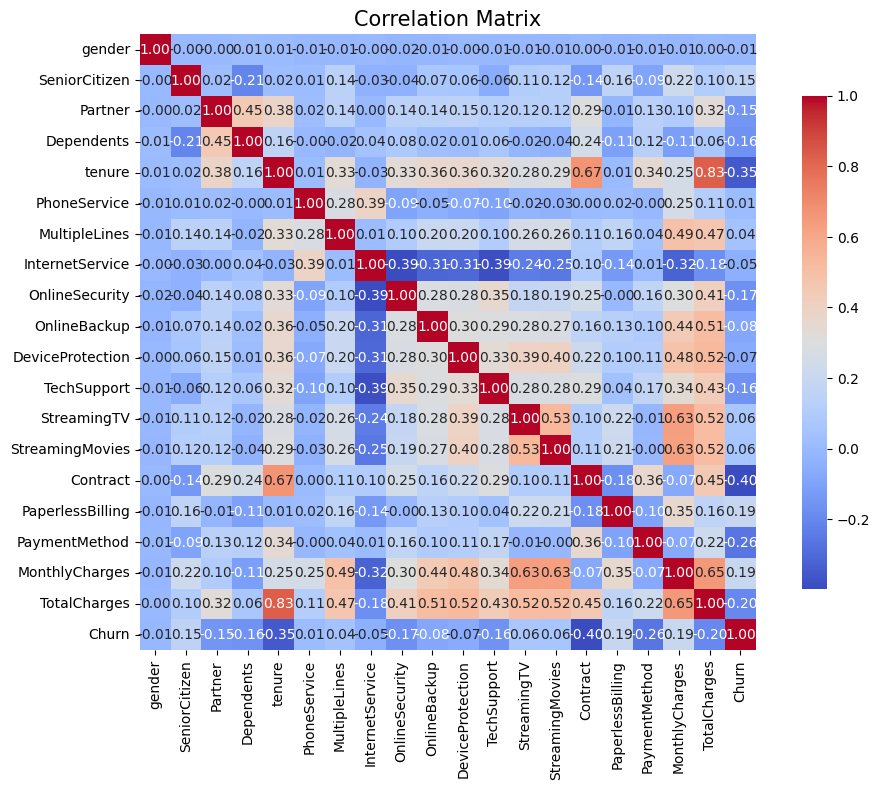

In [30]:
# correlation matrix
corr = td.drop('customerID',axis=1).corr()
plt.figure(figsize=(12, 8))
plt.title('Correlation Matrix', size=15)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()

Strongest Positive Correlations (with Churn)

Feature	            Correlation	         Insight

Contract	        -0.40                Most influential factor. Long-term contracts = lower churn.

tenure	            -0.35	             Customers with longer history are less likely to churn.

OnlineSecurity      -0.17	             Users with this service churn less. Security seems valued.

TechSupport	        -0.16	             Again, churn decreases when Tech Support is active.

DeviceProtection	-0.07	             Protection services lower churn slightly.

OnlineBackup	    -0.08	             Users who backup their data are also more loyal.(Fact)

MonthlyCharges	    +0.19	             Higher charges = slightly higher churn. Price sensitivity.

PaperlessBilling	+0.19	             Users with this billing method churn more. May be digital-only segment

Total Charges       -0.20                Higher total charges = lower churn. Long-term customers are less likely to leave.


gender, PhoneService, MultipleLines, InternetService, OnlineBackup, DeviceProtection, StreamingTV, StreamingMovies are not strongly correlated with churn. [<0.08]

**Recommendation:**
1. New Users - 	Create 30/60/90 day retention plans; personalize onboarding
2. Optional Services - 	Bundle Security + Backup + Support — proven to reduce churn
3. Pricing -	Review high-churn segments with higher charges → run surveys
4. Contract -	Offer discounts for long-term contracts; target month-to-month customers with retention offers
5. Paperless Billing -	Target digital-only customers with retention offers; consider offering discounts for paperless billing




## Feature Selection

In [31]:
# Feature Selection using Correlation Matrix
features = corr['Churn'].sort_values(ascending=False).index.tolist()
features = features[1:]  # Exclude 'Churn' itself
# Let's print features and their correlation values in descending order
print("Features sorted by correlation with 'Churn':")
for feature in features:
    print(f"{feature}: {corr['Churn'][feature]:.2f}")

Features sorted by correlation with 'Churn':
MonthlyCharges: 0.19
PaperlessBilling: 0.19
SeniorCitizen: 0.15
StreamingTV: 0.06
StreamingMovies: 0.06
MultipleLines: 0.04
PhoneService: 0.01
gender: -0.01
InternetService: -0.05
DeviceProtection: -0.07
OnlineBackup: -0.08
Partner: -0.15
Dependents: -0.16
TechSupport: -0.16
OnlineSecurity: -0.17
TotalCharges: -0.20
PaymentMethod: -0.26
tenure: -0.35
Contract: -0.40


<Axes: >

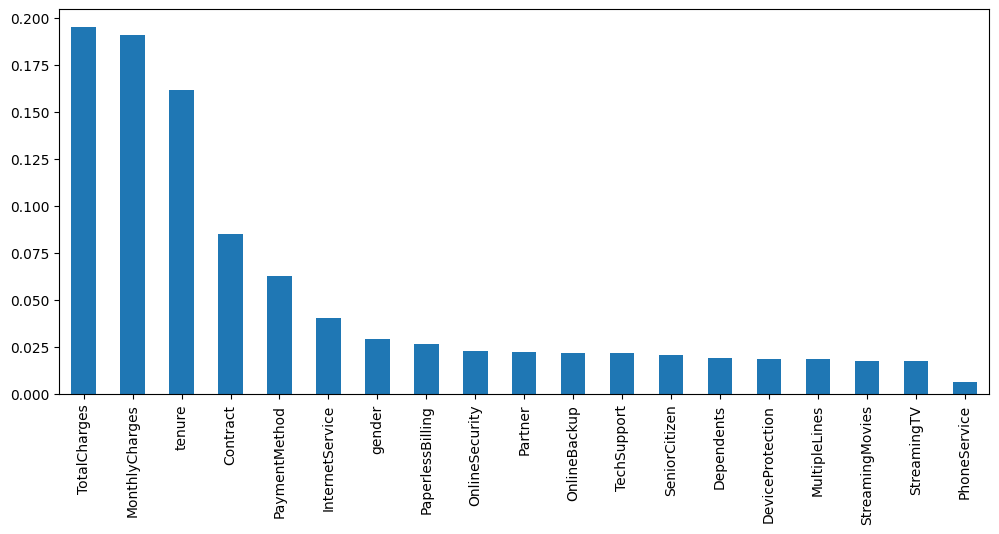

In [32]:
# Select features for testing
X = td.drop(columns=['customerID', 'Churn'])
y = td['Churn']

# Convert categorical to numeric
X = pd.get_dummies(X)

# Train model
rf = RandomForestClassifier()
rf.fit(X, y)

# Show importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))



Final Feature Set (for Model Training):

'TotalCharges', 'MonthlyCharges', 'tenure', 'Contract','PaymentMethod', 'InternetService', 'PaperlessBilling','OnlineSecurity', 'TechSupport', 'OnlineBackup'

## Handling TotalCharges Null values

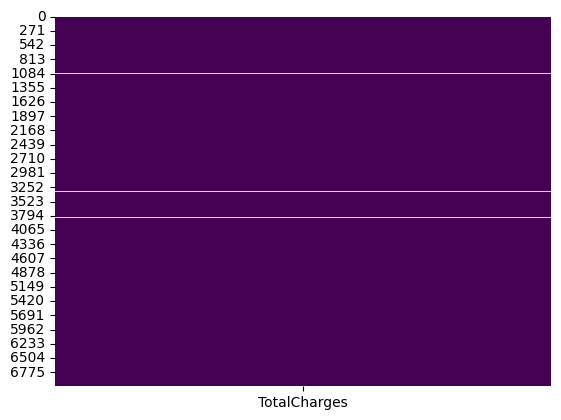

In [33]:
sns.heatmap(td['TotalCharges'].isnull().to_frame(), cbar=False, cmap='viridis')
plt.show()

In [34]:
# Fix TotalCharges from object to float
# First, convert it properly
td['TotalCharges'] = pd.to_numeric(td['TotalCharges'], errors='coerce')

# Then let's check how many NaNs it caused
print("Missing TotalCharges:", td['TotalCharges'].isna().sum())

# Now let's safely fill or drop
td['TotalCharges'] = td['TotalCharges'].fillna(0)  # or use mean/median instead


Missing TotalCharges: 11


In [35]:
print("Missing TotalCharges:", td['TotalCharges'].isna().sum())

Missing TotalCharges: 0


# Save the Preprocessed Data

In [36]:
td.to_csv('../data/telecom_churn_data_cleaned.csv', index=False)

# Train-Test Split, Scaling

In [37]:
# Step 1: Select features and target
final_features = [
    'TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
    'PaymentMethod', 'InternetService', 'PaperlessBilling',
    'OnlineSecurity', 'TechSupport', 'OnlineBackup'
]
X = td[final_features]
y = td['Churn']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Step 3: Scale numeric features
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Step 4: Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Model Training

### 1. Logistic Regression

In [38]:
# Step 1: Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_smote, y_train_smote)

# Step 2: Predict and evaluate
y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7267565649396736

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1035
           1       0.49      0.79      0.60       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.74      1409


Confusion Matrix:
 [[730 305]
 [ 80 294]]


In [39]:
# Train Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.7558552164655784

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1035
           1       0.53      0.63      0.58       374

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.70      1409
weighted avg       0.77      0.76      0.76      1409


Confusion Matrix:
 [[830 205]
 [139 235]]


In [40]:
# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1)  # You can tune this later
xgb.fit(X_train_smote, y_train_smote)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7544357700496807

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      1035
           1       0.53      0.67      0.59       374

    accuracy                           0.75      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.75      0.76      1409


Confusion Matrix:
 [[812 223]
 [123 251]]


c:\Users\SAMSUNG\Pictures\DataAnalyticsProjects\customer_churn_prediction_telecom\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:14:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


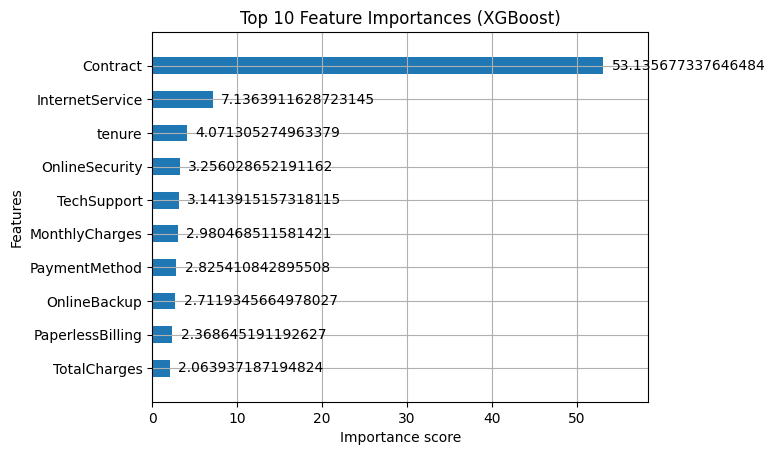

In [41]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb, max_num_features=10, importance_type='gain', height=0.5)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()


# Save the model

In [42]:
# Save the model
joblib.dump(lr, '../models/logistic_regression_churn_model.pkl')

# Save the scaler
joblib.dump(scaler, '../models/scaler.pkl')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [43]:
# Features used: 

joblib.dump(final_features, '../models/features_used.pkl')

['../models/features_used.pkl']